In [2]:
%matplotlib inline

In [45]:
import os, sys, numpy as np, pandas as pd, scipy as sp
import scipy.signal as signal
import scipy.fftpack as fftpack
import matplotlib
import matplotlib.pyplot as plt

In [46]:
def haar(n, a):
    a = int(a)
    n = int(n)
    y = np.zeros(n, dtype=float)
    m = n // 2
    y[m - 2 * a:m] = 1
    y[m: m + 2 * a] = -1
    return y

def haaro(n, a):
    """Odd harr wavelet"""
    a = int(a)
    n = int(n)
    m = n // 2
    y = np.zeros(n, dtype=float)
    y[m - a:m + a] = 1
    y[m - 2 * a: m - a] = 0
    y[m + a: m + 2 * a] = 0
    return y

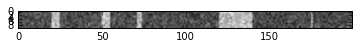

In [81]:
M = 200
z = np.zeros((10,M))
z[:,20:25] = 1
z[:,50:55] = 1
z[:,71:74] = 1
z[:,120:140] = 1
z[:,175:176] = 1
z += np.random.normal(0, 0.2, z.shape)
plt.imshow(z, cmap='gray')

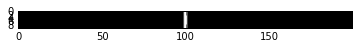

In [82]:
w = 1
kx = np.zeros(z.shape)
kx[:,M//2-w:M//2+w] = 1
plt.imshow(kx, cmap='gray')

In [83]:
kf = fftpack.fft2(kx)

In [84]:
kz = fftpack.fft2(z)

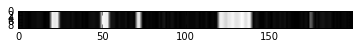

In [87]:
ift = fftpack.fftshift(fftpack.ifft2(kf*kz))
plt.imshow(np.abs(ift), cmap='gray')

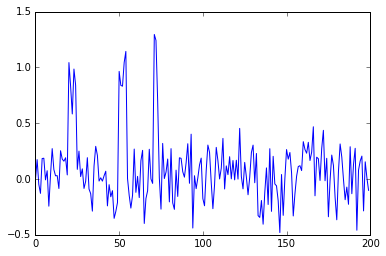

In [43]:
plt.plot(z[0,:].T)

(1, 200)


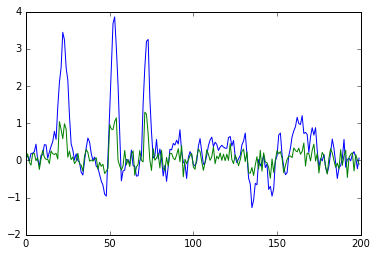

In [44]:
c = signal.cwt(z[0,:].T, haaro, [2])
print(c.shape)
plt.plot(c.T)
plt.plot(z[0,:])